<a href="https://colab.research.google.com/github/mahmoud2571587/Movies-Industry/blob/main/Movie_industry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>MOVIE INDUSTRY</h1>

<h2> 1- Read Data </h2>

import libraries

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib_inline
import matplotlib.pyplot as plt
%matplotlib inline


read data

In [55]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Movie Industry/movies.csv')

<h3> let's start making EDA & understanding Data </h3>
<div>----------------------------------------------</div>
first we can look at the name of columns and rename it to become more informative and easy to read

In [56]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [57]:
new_col = ['mov_name' , 'mov_rating' , 'mov_genre' , 'released_year','released_date' , 'imdb_usr_score' , 
           'usr_votes' , 'director_name' , 'writer_name' ,'star_name' , 'country_origin' ,'mov_budget'  ,
           'mov_gross', 'prod_company' , 'mov_runtime']
df.columns = new_col
df.head()

,mov_name,mov_rating,mov_genre,released_year,released_date,imdb_usr_score,usr_votes,director_name,writer_name,star_name,country_origin,mov_budget,mov_gross,prod_company,mov_runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0



<h2> 2- Exploring Data </h2>

<h3> let's explore data types </h3>

In [58]:
df.shape

(7668, 15)

In [59]:
df.describe()

,released_year,imdb_usr_score,usr_votes,mov_budget,mov_gross,mov_runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


data has (7668) record and has missing value

movies (1980 - 2020)

imbd_usr_score  has range (0.0 - 10.0)


mov_runtime    measure using (miniutes)

In [60]:
df.dtypes

mov_name           object
mov_rating         object
mov_genre          object
released_year       int64
released_date      object
imdb_usr_score    float64
usr_votes         float64
director_name      object
writer_name        object
star_name          object
country_origin     object
mov_budget        float64
mov_gross         float64
prod_company       object
mov_runtime       float64
dtype: object

*   released_date       (should be a date )
*   usr_votes          (should be int and has null value)
*   mov_budget         (should be int and has null value)
*   mov_gross          (should be int and has null value)

<div> =========================================</div>

**Categorical columns :**
mov_name , mov_rating , mov_genre, director_name , star_name , writer_name ,country_origin ,prod_company

**Numerica columns :** imdb_usr_score , usr_votes,mov_budget , mov_gross , mov_runtime ,released_year

**date columns :**  released_year , released_date 










<h3>let's explore Missing values </h3>

In [61]:
df.isnull().sum().sort_values(ascending =False)

mov_budget        2171
mov_gross          189
mov_rating          77
prod_company        17
mov_runtime          4
imdb_usr_score       3
usr_votes            3
writer_name          3
country_origin       3
released_date        2
star_name            1
mov_name             0
mov_genre            0
released_year        0
director_name        0
dtype: int64

percentage of missing value

In [62]:
def missing_value (df):
  miss_value = df.isnull().sum().sort_values(ascending =False)
  percent_miss_value = round(miss_value / len(df)*100 , 2)
  return pd.concat((miss_value , percent_miss_value) , axis =1 ,keys =['total_miss' , 'percentage_miss'])

In [63]:
missing_value(df)

,total_miss,percentage_miss
mov_budget,2171,28.31
mov_gross,189,2.46
mov_rating,77,1.00
prod_company,17,0.22
mov_runtime,4,0.05
imdb_usr_score,3,0.04
usr_votes,3,0.04
writer_name,3,0.04
country_origin,3,0.04
released_date,2,0.03


<h3>let's explore Duplicate values</h3>

In [64]:
df[df.duplicated(keep = 'last')]

,mov_name,mov_rating,mov_genre,released_year,released_date,imdb_usr_score,usr_votes,director_name,writer_name,star_name,country_origin,mov_budget,mov_gross,prod_company,mov_runtime


ther is no duplicated data 

<h3> a- Let's Explore Numerical Data  </h3>

Numerica columns : imdb_usr_score , usr_votes,mov_budget , mov_gross , mov_runtime



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

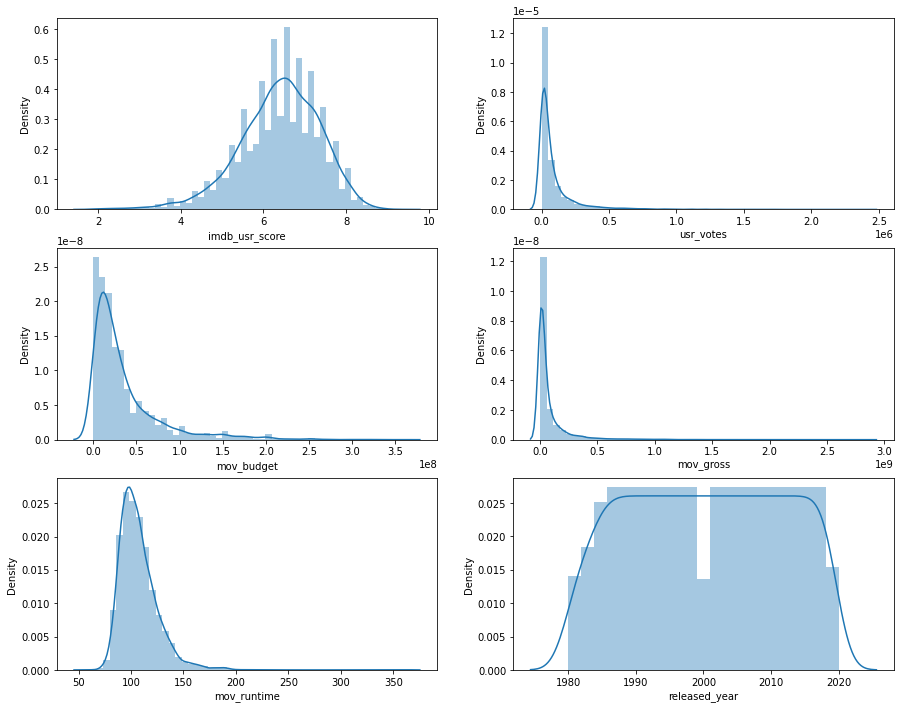

In [65]:
fg = plt.figure(figsize=(15,12))
#plot imdb_usr_score
plt.subplot(3,2,1)
sns.distplot(df['imdb_usr_score'])

#plot usr_votes
plt.subplot(3,2,2)
sns.distplot(df['usr_votes'])

#plot mov_budget
plt.subplot(3,2,3)
sns.distplot(df['mov_budget'])

#plot mov_gross
plt.subplot(3,2,4)
sns.distplot(df['mov_gross'])

#plot mov_runtime
plt.subplot(3,2,5)
sns.distplot(df['mov_runtime'])

#plot released_year
plt.subplot(3,2,6)
sns.distplot(df['released_year'])

mov_runtime , imbd_user_score ===> has normal distribution 

mov_gross , mov_budget , user_votes ==> need to clean  and have (Right Skewed)

released_year has (uniform) distribution

<h2>let's show correlation between numeric columns with mov_gross  using scatter plot<h2>

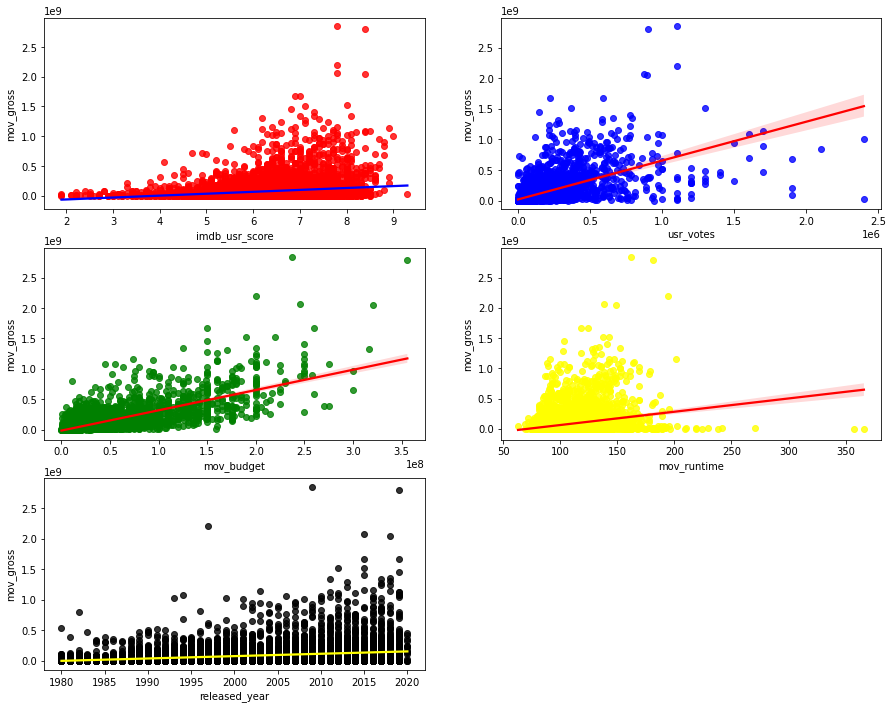

In [66]:
fg = plt.figure(figsize=(15,12))
#plot imdb_usr_score
plt.subplot(3,2,1)
sns.regplot(x = 'imdb_usr_score' , y='mov_gross' , data=df , 
            scatter_kws = {'color':'red'} , line_kws={'color' : 'blue'})

#plot usr_votes
plt.subplot(3,2,2)
sns.regplot(x='usr_votes' , y='mov_gross' , data= df , 
            scatter_kws={'color' : 'blue'} , line_kws={'color' : 'red'})

#plot mov_budget
plt.subplot(3,2,3)
sns.regplot(x='mov_budget' , y='mov_gross' , data= df , 
            scatter_kws={'color' : 'green'} , line_kws={'color' : 'red'})

#plot mov_runtime
plt.subplot(3,2,4)
sns.regplot(x='mov_runtime' , y='mov_gross' , data= df , 
            scatter_kws={'color' : 'yellow'} , line_kws={'color' : 'red'})

#plot released_year
plt.subplot(3,2,5)
sns.regplot(x='released_year' , y='mov_gross' , data= df , 
            scatter_kws={'color' : 'black'} , line_kws={'color' : 'yellow'})


there is : 
=========

**strong positive correlation:** (usr_votes , mov_gross) , (mov_budget , mov_gross) 

**weak positive correlation:** (mov_runtime , mov_gross)

**NO correlation:**  (imdb_user_score , mov_gross) , (released_year , mov_gross)


<h4>let's check values of correlation</h4>

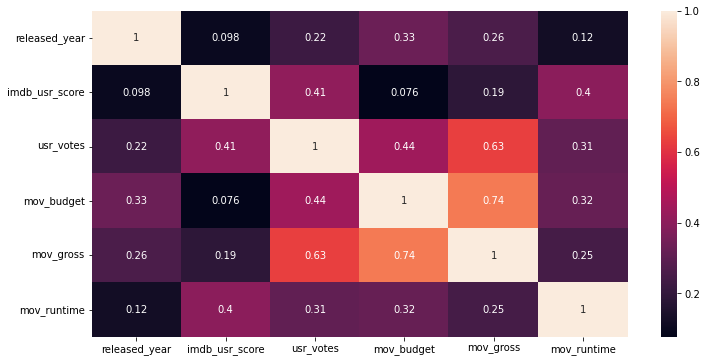

In [67]:
fg = plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

In [68]:
corr = df.corr()['mov_gross'].sort_values(ascending = False)
corr

mov_gross         1.000000
mov_budget        0.740395
usr_votes         0.630757
released_year     0.257486
mov_runtime       0.245216
imdb_usr_score    0.186258
Name: mov_gross, dtype: float64

<h3> b- Let's Explore Categorical Data </h3> 

**Categorical columns :** mov_name , mov_rating , mov_genre, director_name , star_name , writer_name ,country_origin ,prod_company

In [69]:
categorical_data = df[['mov_name' , 'mov_rating' , 'mov_genre', 'director_name' , 'star_name' , 
                      'writer_name' ,'country_origin' ,'prod_company' ,'released_date']]
categorical_data


,mov_name,mov_rating,mov_genre,director_name,star_name,writer_name,country_origin,prod_company,released_date
0,The Shining,R,Drama,Stanley Kubrick,Jack Nicholson,Stephen King,United Kingdom,Warner Bros.,"June 13, 1980 (United States)"
1,The Blue Lagoon,R,Adventure,Randal Kleiser,Brooke Shields,Henry De Vere Stacpoole,United States,Columbia Pictures,"July 2, 1980 (United States)"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,Irvin Kershner,Mark Hamill,Leigh Brackett,United States,Lucasfilm,"June 20, 1980 (United States)"
3,Airplane!,PG,Comedy,Jim Abrahams,Robert Hays,Jim Abrahams,United States,Paramount Pictures,"July 2, 1980 (United States)"
4,Caddyshack,R,Comedy,Harold Ramis,Chevy Chase,Brian Doyle-Murray,United States,Orion Pictures,"July 25, 1980 (United States)"
...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,Joseph Ebanks,Shannon Bond,Joseph Ebanks,United States,NaN,"October 23, 2020 (United States)"
7664,Dream Round,NaN,Comedy,Dusty Dukatz,Michael Saquella,Lisa Huston,United States,Cactus Blue Entertainment,"February 7, 2020 (United States)"
7665,Saving Mbango,NaN,Drama,Nkanya Nkwai,Onyama Laura,Lynno Lovert,United States,Embi Productions,"April 27, 2020 (Cameroon)"
7666,It's Just Us,NaN,Drama,James Randall,Christina Roz,James Randall,United States,NaN,"October 1, 2020 (United States)"


released_date  ==> has name of the country release movie beside date

explore missing data on Categorical Data 

In [70]:
missing_value(categorical_data)

,total_miss,percentage_miss
mov_rating,77,1.00
prod_company,17,0.22
writer_name,3,0.04
country_origin,3,0.04
released_date,2,0.03
star_name,1,0.01
mov_name,0,0.00
mov_genre,0,0.00
director_name,0,0.00


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Type of Movie')

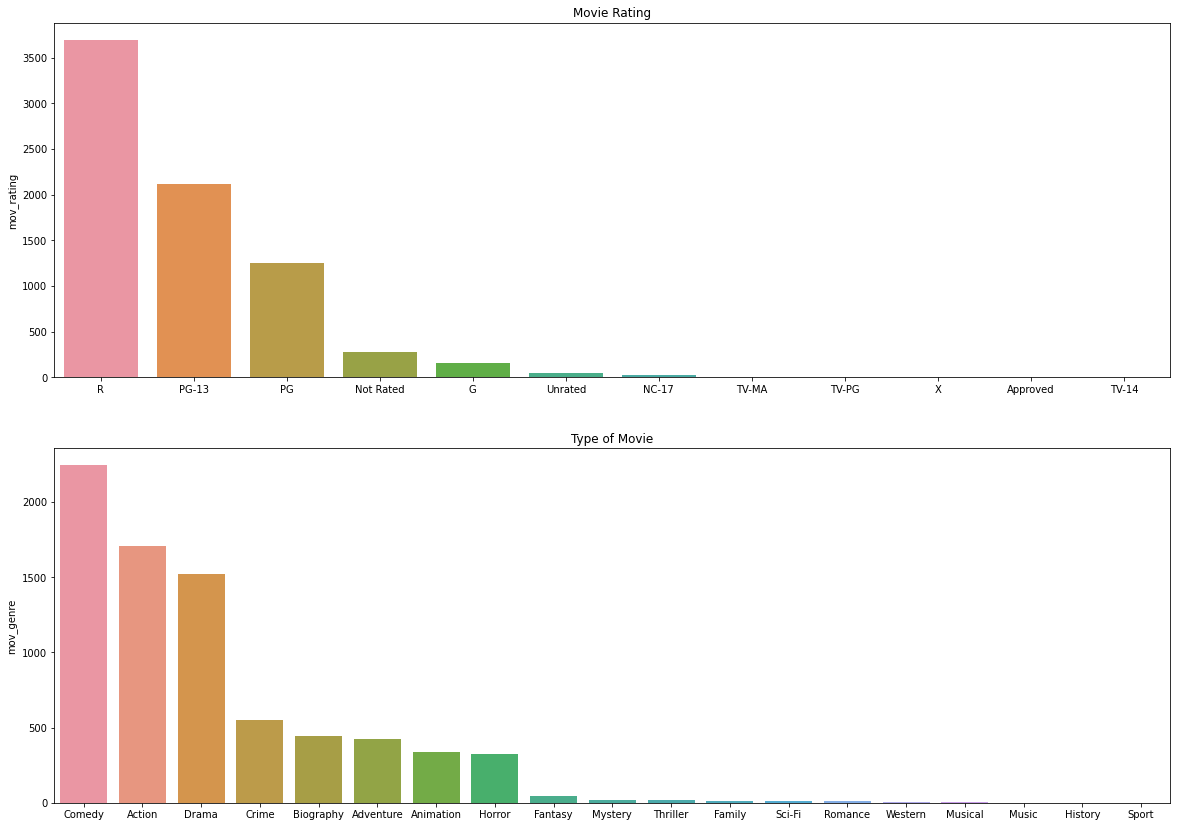

In [71]:
fg = plt.figure(figsize=(20,30))
#plot mov_rating
plt.subplot(4,1,1)
sns.barplot( categorical_data['mov_rating'].value_counts().index,
            categorical_data['mov_rating'].value_counts()).set_title('Movie Rating')

#plot mov_genre
plt.subplot(4,1,2)
sns.barplot(categorical_data['mov_genre'].value_counts().index ,
            categorical_data['mov_genre'].value_counts()).set_title('Type of Movie')

<h1> 3- Cleaning Data </h1>



 <h3>1- Missing Data </h3>

In [72]:
missing_value(df)

,total_miss,percentage_miss
mov_budget,2171,28.31
mov_gross,189,2.46
mov_rating,77,1.00
prod_company,17,0.22
mov_runtime,4,0.05
imdb_usr_score,3,0.04
usr_votes,3,0.04
writer_name,3,0.04
country_origin,3,0.04
released_date,2,0.03


because mov_budget is the most column related with mov_gross and in case of we don't know both column this can effect on quality of data, so i prefer to drop all recods that has missing value in both column 

In [73]:
df.dropna(how = 'all' , subset=['mov_budget' , 'mov_gross'] ,inplace =True)
df.isnull().sum().sort_values(ascending =False)

mov_budget        2043
mov_rating          62
mov_gross           61
prod_company        14
imdb_usr_score       3
usr_votes            3
writer_name          3
mov_runtime          2
star_name            1
country_origin       1
mov_name             0
mov_genre            0
released_year        0
released_date        0
director_name        0
dtype: int64

we can delete records of this missing Value 

<ul>
<li>mov_runtime   ===>       4</li>
<li>imdb_usr_score  ===>     3</li>
<li>usr_votes       ===>     3</li>
<li>writer_name    ===>      3</li>
<li>country_origin    ===>   3</li>
<li>released_date   ===>     2</li>
<li>star_name         ===>   1</li>
</ul>

In [74]:
df.dropna(subset =['star_name','released_date','imdb_usr_score','country_origin','writer_name','mov_runtime'] ,
          inplace = True)
#missing_value(df)
df.isnull().sum().sort_values(ascending =False)

mov_budget        2040
mov_rating          57
mov_gross           56
prod_company        12
mov_name             0
mov_genre            0
released_year        0
released_date        0
imdb_usr_score       0
usr_votes            0
director_name        0
writer_name          0
star_name            0
country_origin       0
mov_runtime          0
dtype: int64

Clean missing values in Prod_company column

In [75]:
df['prod_company'] = df[['prod_company']].apply(lambda x : x.fillna(x.value_counts().index[0]) )
df.isnull().sum().sort_values(ascending = False)

mov_budget        2040
mov_rating          57
mov_gross           56
mov_name             0
mov_genre            0
released_year        0
released_date        0
imdb_usr_score       0
usr_votes            0
director_name        0
writer_name          0
star_name            0
country_origin       0
prod_company         0
mov_runtime          0
dtype: int64

I think that budget of movies depended on type of movie 

so we can clean missing data in 'mov_buget' an 'mov_gross' based on 'mov_genre'

In [76]:
df['mov_budget']= df.groupby(['mov_genre'])['mov_budget'].apply(lambda x : x.fillna(x.mean()))
df.isnull().sum().sort_values(ascending = False)

mov_rating        57
mov_gross         56
mov_budget         4
mov_name           0
mov_genre          0
released_year      0
released_date      0
imdb_usr_score     0
usr_votes          0
director_name      0
writer_name        0
star_name          0
country_origin     0
prod_company       0
mov_runtime        0
dtype: int64

In [77]:
df['mov_genre'].value_counts()

Comedy       2205
Action       1681
Drama        1475
Crime         547
Biography     436
Adventure     422
Animation     335
Horror        316
Fantasy        43
Mystery        20
Thriller       14
Family         11
Sci-Fi         10
Romance         8
Western         3
Musical         2
Music           1
Sport           1
Name: mov_genre, dtype: int64

there is 4 records still have missing values because of no repeat of genre of this movie 

we can fill it with mean of mov_buget

In [78]:
#df['mov_budget'].mean()
df['mov_budget'] = df['mov_budget'].fillna(df['mov_budget'].mean())
missing_value(df)

,total_miss,percentage_miss
mov_rating,57,0.76
mov_gross,56,0.74
mov_name,0,0.00
mov_genre,0,0.00
released_year,0,0.00
released_date,0,0.00
imdb_usr_score,0,0.00
usr_votes,0,0.00
director_name,0,0.00
writer_name,0,0.00


let's fill mov_gross 

In [79]:
df['mov_gross'] = df.groupby(['mov_genre'])['mov_gross'].apply(lambda x : x.fillna(x.mean()))
missing_value(df)

,total_miss,percentage_miss
mov_rating,57,0.76
mov_name,0,0.00
mov_genre,0,0.00
released_year,0,0.00
released_date,0,0.00
imdb_usr_score,0,0.00
usr_votes,0,0.00
director_name,0,0.00
writer_name,0,0.00
star_name,0,0.00


let's clean **mov_rating**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Movie Rating')

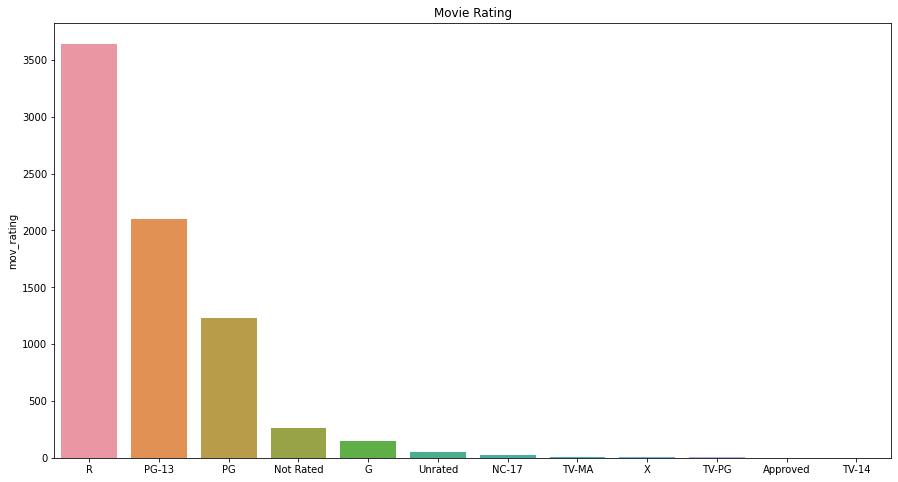

In [80]:

fg = plt.figure(figsize=(15,8))
sns.barplot( df['mov_rating'].value_counts().index,
            df['mov_rating'].value_counts()).set_title('Movie Rating')


first we convert Unrated and Not Rated to nan

In [81]:
df['mov_rating'].unique()

array(['R', 'PG', 'G', nan, 'Not Rated', 'NC-17', 'Approved', 'PG-13',
       'Unrated', 'X', 'TV-PG', 'TV-MA', 'TV-14'], dtype=object)

In [82]:
df['mov_rating'] = df['mov_rating'].replace(['Unrated' ] ,'Not Rated')
df['mov_rating'].unique()

array(['R', 'PG', 'G', nan, 'Not Rated', 'NC-17', 'Approved', 'PG-13',
       'X', 'TV-PG', 'TV-MA', 'TV-14'], dtype=object)

In [83]:
df[df['mov_rating'].isnull()]
df.isnull().sum().sort_values(ascending = False)

mov_rating        57
mov_name           0
mov_genre          0
released_year      0
released_date      0
imdb_usr_score     0
usr_votes          0
director_name      0
writer_name        0
star_name          0
country_origin     0
mov_budget         0
mov_gross          0
prod_company       0
mov_runtime        0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Movie Rating')

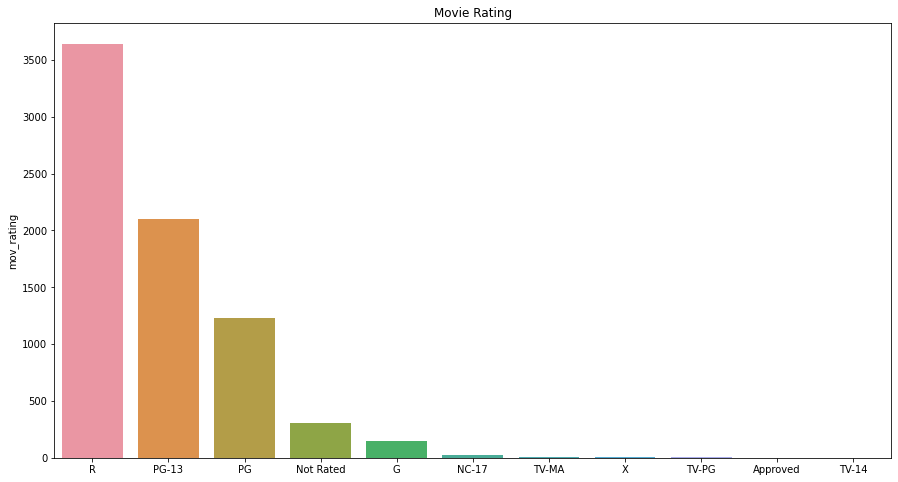

In [84]:
fg = plt.figure(figsize=(15,8))
sns.barplot( df['mov_rating'].value_counts().index,
            df['mov_rating'].value_counts()).set_title('Movie Rating')

In [85]:
df['mov_rating'].value_counts()

R            3644
PG-13        2097
PG           1231
Not Rated     309
G             152
NC-17          23
TV-MA           9
X               3
TV-PG           3
Approved        1
TV-14           1
Name: mov_rating, dtype: int64

In [86]:
df['mov_rating'] = df['mov_rating'].fillna(df['mov_rating'].value_counts().index[0])
df.isnull().sum().sort_values(ascending = False)

mov_name          0
mov_rating        0
mov_genre         0
released_year     0
released_date     0
imdb_usr_score    0
usr_votes         0
director_name     0
writer_name       0
star_name         0
country_origin    0
mov_budget        0
mov_gross         0
prod_company      0
mov_runtime       0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Movie Rating')

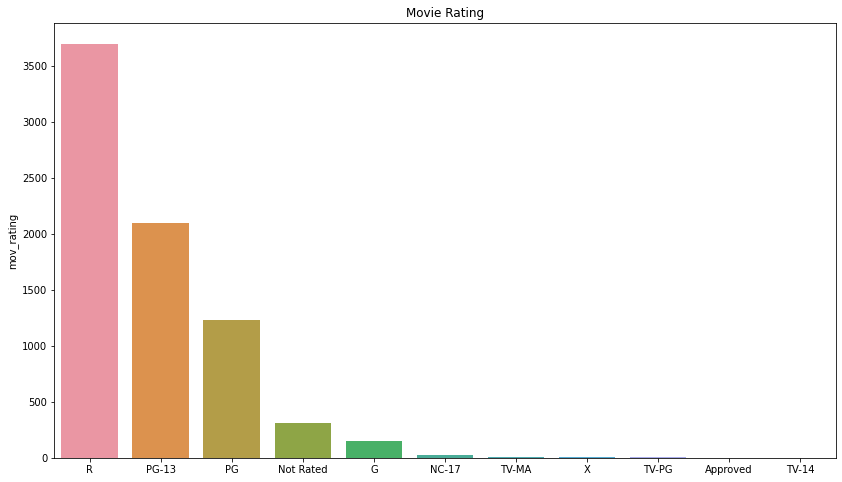

In [87]:
fg = plt.figure(figsize=(14,8))
sns.barplot( df['mov_rating'].value_counts().index,
            df['mov_rating'].value_counts()).set_title('Movie Rating')

<h3> Clean Date </h3>

LET'S clean released_date column

In [88]:
df[['released_date']]

,released_date
0,"June 13, 1980 (United States)"
1,"July 2, 1980 (United States)"
2,"June 20, 1980 (United States)"
3,"July 2, 1980 (United States)"
4,"July 25, 1980 (United States)"
...,...
7656,"June 3, 2020 (United States)"
7657,"September 25, 2020 (United States)"
7658,"February 7, 2020 (United States)"
7659,"March 3, 2020 (United States)"


we notice that released_data column has name of country beside date 

so we should split it 

In [89]:
df[['release_date' , 'country_release']] = df['released_date'].str.split('(', expand=True)
df.head()

,mov_name,mov_rating,mov_genre,released_year,released_date,imdb_usr_score,usr_votes,director_name,writer_name,star_name,country_origin,mov_budget,mov_gross,prod_company,mov_runtime,release_date,country_release
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,"June 13, 1980",United States)
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,"July 2, 1980",United States)
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,"June 20, 1980",United States)
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,"July 2, 1980",United States)
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,"July 25, 1980",United States)


remove ')' from country_released

In [90]:
df['country_release'] = df['country_release'].str.replace(')',' ')
df[['country_release']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,country_release
0,United States
1,United States
2,United States
3,United States
4,United States
...,...
7656,United States
7657,United States
7658,United States
7659,United States


let's extract year of release to know what is the different between columns

In [91]:
df['year_of_release'] = df['release_date'].str[-5:]
#convert data type of year_date to Int
#df['year_of_release']=df['year_of_release'].astype('int64')
#df[['year_of_release' , 'released_year']].value_counts()

extract month from released_date

In [92]:
import re
df['month_release'] = df['released_date'].str.extract("(\w*)")
df['month_release']

0            June
1            July
2            June
3            July
4            July
          ...    
7656         June
7657    September
7658     February
7659        March
7663      October
Name: month_release, Length: 7530, dtype: object

In [93]:
df['month_release'].unique()

array(['June', 'July', 'May', 'December', 'October', 'September',
       'February', 'April', 'August', 'March', 'November', 'January',
       '1982', '1985', '1987', '1995', '2019', '2013'], dtype=object)

In [94]:
# display these data
df[
   (df['month_release'] =='1982')  | (df['month_release'] =='1985') |
   (df['month_release'] =='1987')  | (df['month_release'] =='1995') |
   (df['month_release'] =='2019')  | (df['month_release'] =='2013')]

,mov_name,mov_rating,mov_genre,released_year,released_date,imdb_usr_score,usr_votes,director_name,writer_name,star_name,country_origin,mov_budget,mov_gross,prod_company,mov_runtime,release_date,country_release,year_of_release,month_release
312,Five Days One Summer,PG,Drama,1982,1982 (Japan),6.1,1000.0,Fred Zinnemann,Michael Austin,Sean Connery,United States,1.500000e+07,199078.0,Cable and Wireless Finance,108.0,1982,Japan,1982,1982
786,Taipei Story,Not Rated,Drama,1985,1985 (Taiwan),7.7,2500.0,Edward Yang,T'ien-wen Chu,Chin Tsai,Taiwan,2.299177e+07,35336.0,Evergreen Film Company,119.0,1985,Taiwan,1985,1985
800,O.C. and Stiggs,R,Comedy,1985,1985 (United States),5.4,1200.0,Robert Altman,Tod Carroll,Daniel Jenkins,United States,7.000000e+06,29815.0,Metro-Goldwyn-Mayer (MGM),109.0,1985,United States,1985,1985
1173,The House on Carroll Street,PG,Thriller,1987,1987 (United States),6.1,2300.0,Peter Yates,Walter Bernstein,Kelly McGillis,United States,1.400000e+07,459824.0,Orion Pictures,101.0,1987,United States,1987,1987
2816,The White Balloon,Not Rated,Drama,1995,1995 (Iran),7.7,6900.0,Jafar Panahi,Abbas Kiarostami,Aida Mohammadkhani,Iran,1.500000e+05,924940.0,Farabi Cinema Foundation,85.0,1995,Iran,1995,1995
4187,Dahmer,R,Biography,2002,2019 (United States),5.6,9700.0,David Jacobson,David Birke,Jeremy Renner,United States,2.500000e+05,144008.0,Blockbuster Films,101.0,2019,United States,2019,2019
6413,Romeo and Juliet,PG-13,Drama,2013,2013 (United States),5.8,11000.0,Carlo Carlei,Arthur Brooke,Hailee Steinfeld,United Kingdom,2.299177e+07,2966268.0,Amber Entertainment,118.0,2013,United States,2013,2013


we should delete these rows

In [95]:
df['month_release'] = df['month_release'].replace(['1982', '1985', '1987', '1995', '2019', '2013'] , np.nan)
df['month_release'].unique()

array(['June', 'July', 'May', 'December', 'October', 'September',
       'February', 'April', 'August', 'March', 'November', 'January', nan],
      dtype=object)

In [96]:
df.dropna(subset =['month_release'] , inplace = True)
df['month_release'].unique()

array(['June', 'July', 'May', 'December', 'October', 'September',
       'February', 'April', 'August', 'March', 'November', 'January'],
      dtype=object)

there is little differenct between two values 
so we can depend on year_of_release more than 'released_year'

let's drop released_year column ,release_date , released_date

In [97]:
df.drop(['released_year' , 'release_date' ,'released_date'] , axis = 1 , inplace=True)

In [98]:
df['date'] = df['month_release'] + df['year_of_release']
df['date'] = df['date'].str.strip()
df.head()

,mov_name,mov_rating,mov_genre,imdb_usr_score,usr_votes,director_name,writer_name,star_name,country_origin,mov_budget,mov_gross,prod_company,mov_runtime,country_release,year_of_release,month_release,date
0,The Shining,R,Drama,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,United States,1980,June,June1980
1,The Blue Lagoon,R,Adventure,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,United States,1980,July,July1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,United States,1980,June,June1980
3,Airplane!,PG,Comedy,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,United States,1980,July,July1980
4,Caddyshack,R,Comedy,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,United States,1980,July,July1980


In [99]:
# convert date column to datetime datatype
df['date'] = pd.to_datetime(df['date'].str.strip() , format = ('%B%Y'))
df['date']

0      1980-06-01
1      1980-07-01
2      1980-06-01
3      1980-07-01
4      1980-07-01
          ...    
7656   2020-06-01
7657   2020-09-01
7658   2020-02-01
7659   2020-03-01
7663   2020-10-01
Name: date, Length: 7523, dtype: datetime64[ns]

In [100]:
df.head()

,mov_name,mov_rating,mov_genre,imdb_usr_score,usr_votes,director_name,writer_name,star_name,country_origin,mov_budget,mov_gross,prod_company,mov_runtime,country_release,year_of_release,month_release,date
0,The Shining,R,Drama,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,United States,1980,June,1980-06-01
1,The Blue Lagoon,R,Adventure,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,United States,1980,July,1980-07-01
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,United States,1980,June,1980-06-01
3,Airplane!,PG,Comedy,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,United States,1980,July,1980-07-01
4,Caddyshack,R,Comedy,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,United States,1980,July,1980-07-01


we can make new column for claculate **profit** and another column for calculate 
**Return of Investment**

In [101]:
df['profit'] = df['mov_gross'] - df['mov_budget']
df['ROI'] = round((df['profit'] / df['mov_budget'])*100,2)
df.head()

,mov_name,mov_rating,mov_genre,imdb_usr_score,usr_votes,director_name,writer_name,star_name,country_origin,mov_budget,mov_gross,prod_company,mov_runtime,country_release,year_of_release,month_release,date,profit,ROI
0,The Shining,R,Drama,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,United States,1980,June,1980-06-01,27998772.0,147.36
1,The Blue Lagoon,R,Adventure,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,United States,1980,July,1980-07-01,54353106.0,1207.85
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,United States,1980,June,1980-06-01,520375067.0,2890.97
3,Airplane!,PG,Comedy,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,United States,1980,July,1980-07-01,79953539.0,2284.39
4,Caddyshack,R,Comedy,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,United States,1980,July,1980-07-01,33846344.0,564.11


edit data type of mov_budget , mov_gross  from 'float' to int because they have zero with decimal

also usr_votes should be int

In [102]:
for col in ['mov_budget' , 'mov_gross' , 'usr_votes','year_of_release']:
  df[col] = df[col].astype('int64')
df.dtypes

mov_name                   object
mov_rating                 object
mov_genre                  object
imdb_usr_score            float64
usr_votes                   int64
director_name              object
writer_name                object
star_name                  object
country_origin             object
mov_budget                  int64
mov_gross                   int64
prod_company               object
mov_runtime               float64
country_release            object
year_of_release             int64
month_release              object
date               datetime64[ns]
profit                    float64
ROI                       float64
dtype: object

rearrange columns in df 

In [103]:
df= df.reindex(columns = ['mov_name' , 'director_name' , 'writer_name' ,'star_name' ,'prod_company',
                          'country_origin' , 'country_release' ,'month_release', 'year_of_release','date',
                          'mov_genre' ,'mov_rating', 'imdb_usr_score','usr_votes','mov_runtime',
                          'mov_budget' , 'mov_gross' ,'profit' , 'ROI'])
df.head()

,mov_name,director_name,writer_name,star_name,prod_company,country_origin,country_release,month_release,year_of_release,date,mov_genre,mov_rating,imdb_usr_score,usr_votes,mov_runtime,mov_budget,mov_gross,profit,ROI
0,The Shining,Stanley Kubrick,Stephen King,Jack Nicholson,Warner Bros.,United Kingdom,United States,June,1980,1980-06-01,Drama,R,8.4,927000,146.0,19000000,46998772,27998772.0,147.36
1,The Blue Lagoon,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,Columbia Pictures,United States,United States,July,1980,1980-07-01,Adventure,R,5.8,65000,104.0,4500000,58853106,54353106.0,1207.85
2,Star Wars: Episode V - The Empire Strikes Back,Irvin Kershner,Leigh Brackett,Mark Hamill,Lucasfilm,United States,United States,June,1980,1980-06-01,Action,PG,8.7,1200000,124.0,18000000,538375067,520375067.0,2890.97
3,Airplane!,Jim Abrahams,Jim Abrahams,Robert Hays,Paramount Pictures,United States,United States,July,1980,1980-07-01,Comedy,PG,7.7,221000,88.0,3500000,83453539,79953539.0,2284.39
4,Caddyshack,Harold Ramis,Brian Doyle-Murray,Chevy Chase,Orion Pictures,United States,United States,July,1980,1980-07-01,Comedy,R,7.3,108000,98.0,6000000,39846344,33846344.0,564.11


Save to csv for make more analysis on power BI dashboard

In [104]:
df.to_csv('cleaned_movies_industry.csv' ,index=False)
print('Data Cleaning Process Done! \n thank you')

Data Cleaning Process Done! 
 thank you
